In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.shape

(4566, 40)

In [4]:
df.columns

Index(['grad year', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [5]:
for i in df:
    if df[i].isnull().sum()>0:
        print(i,"-----------",df[i].isnull().sum())

gender ----------- 435
age ----------- 726


In [6]:
df["age"] = df["age"].ffill()
df["gender"] = df["gender"].ffill()

In [7]:
df["grad year"].value_counts(dropna=False)

,count
grad year,
2006,4566


In [8]:
df.drop(columns="grad year",inplace=True)

In [ ]:
df.columns(ob)

In [9]:
dff = pd.get_dummies(df["gender"])

In [14]:
dff

,F,M,age
0,False,True,0.135531
1,True,False,0.133752
2,False,True,0.129171
3,True,False,0.134479
4,True,False,0.135659
...,...,...,...
4561,True,False,0.128238
4562,True,False,0.132052
4563,True,False,0.135580
4564,True,False,0.134342


In [ ]:
df.drop(columns = "gender",inplace = True)

In [10]:
from sklearn.cluster import KMeans

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
sc = MinMaxScaler()
dff["age"] = sc.fit_transform(df[["age"]])

In [ ]:
km = KMeans(n_clusters=3,random_state=88)
km.fit(df)

KMeans(n_clusters=3, random_state=88)

In [ ]:
df["cluster"]=km.predict(df)

In [ ]:
df1 =  df[df["cluster"]==0]
df2 =  df[df["cluster"]==1]
df3 =  df[df["cluster"]==2]

In [ ]:
km.cluster_centers_

array([[1.37371825e-01, 9.81703071e+00, 1.99746755e-01, 2.21905666e-01,
        1.31054131e-01, 9.68660969e-02, 8.51535296e-02, 9.21177588e-02,
        6.10952833e-02, 9.74992086e-02, 6.93257360e-02, 1.08578664e-01,
        2.66223488e-01, 2.02912314e-01, 1.08895220e-01, 8.70528648e-02,
        7.31244065e-02, 3.37132004e-01, 2.52295030e-01, 4.11522634e-02,
        6.88825578e-01, 1.95948085e-01, 4.31465654e-01, 2.02595758e-01,
        9.05349794e-02, 2.59575815e-02, 3.28901551e-01, 1.26305793e-01,
        5.85628363e-02, 1.63342830e-01, 2.81734726e-01, 1.14909782e-01,
        3.51377018e-02, 2.53244698e-02, 1.47515036e-01, 1.13327002e-01,
        1.04463438e-01, 5.41310541e-02, 5.66413422e+00],
       [1.31892742e-01, 1.25500000e+02, 2.64150943e-01, 2.87735849e-01,
        1.13207547e-01, 9.43396226e-02, 1.17924528e-01, 8.01886792e-02,
        1.55660377e-01, 1.41509434e-01, 7.54716981e-02, 1.27358491e-01,
        4.10377358e-01, 1.88679245e-01, 1.32075472e-01, 1.32075472e-01,
       

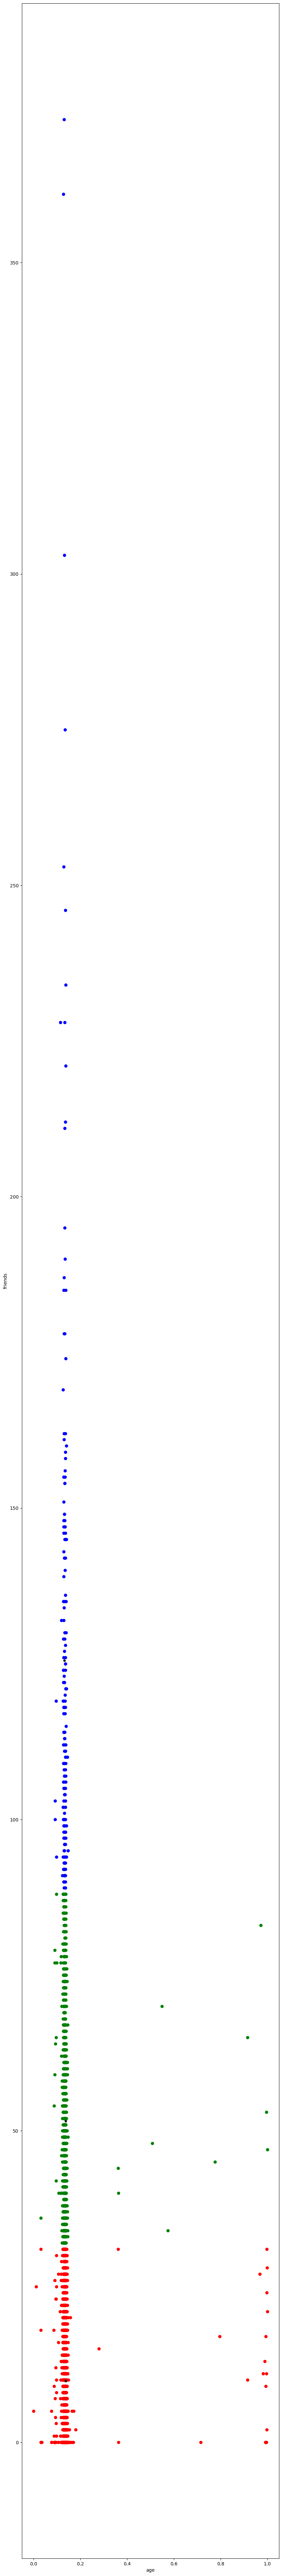

In [ ]:
plt.figure(figsize=(10,100))
plt.scatter(df1["age"], df1["friends"], color="red")
plt.scatter(df2["age"], df2["friends"], color="blue")
plt.scatter(df3["age"], df3["friends"], color="green")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker="*", color="k")
plt.xlabel("age")
plt.ylabel("friends")

plt.show()


In [ ]:
wcss=[]              #Weights
nclus = []           #clusters
for i in range(2,21):
    km = KMeans(n_clusters=i,random_state=88)
    km.fit(df)
    wcss.append(km.inertia_)
    nclus.append(i)

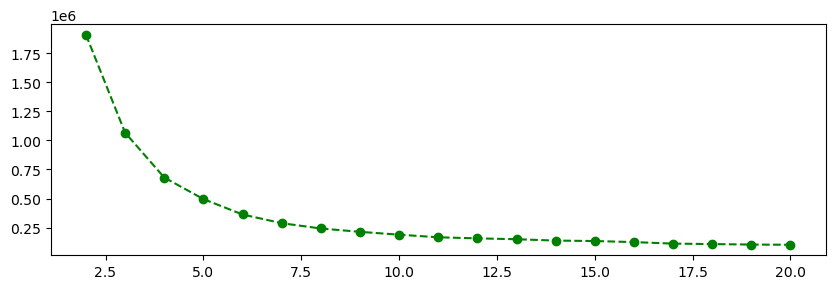

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(nclus,wcss,"go--")
plt.show()